<a href="https://colab.research.google.com/github/satyamkulkarni122/Integrated_Retail_Analytics/blob/main/Integrated_Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Integrated Retail Analytics for Store Optimization and Demand Forecasting

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Based on the analysis conducted on three datasets – sales_df, stores_df, and features_df – several key insights and conclusions have been drawn.

Dataset Overview: The sales_df contains information about weekly sales per store, while the stores_df provides details about store numbers and sizes. The features_df dataset offers additional information about store features. It's noteworthy that there are no duplicate values across all datasets, although features_df contains some null values.

Market Basket Analysis: Segment 1 or Cluster 1 exhibits the highest average sales, indicating potentially lucrative opportunities for targeted marketing or promotional strategies. On the other hand, Segment 0 shows the highest average unemployment rate, which could influence consumer behavior and purchasing power. Additionally, department 2 emerges with the highest weekly sales among all departments.

Seasonal Variation: Analysis of seasonal variation in sales reveals spikes in sales at the end of December, coinciding with the Christmas festival. This observation underscores the impact of seasonal factors on consumer spending patterns and suggests opportunities for targeted marketing campaigns or promotions during festive seasons.

Sales Prediction: For sales predictions, an Exponential Smoothing additive method was employed as the machine learning algorithm. By splitting the data into training and testing sets, the model achieved promising results with a Root Mean Square Error (RMSE) value of 1584 and a Mean Absolute Error (MAE) of 1189. These metrics indicate the model's effectiveness in accurately predicting sales figures, thereby aiding in strategic decision-making and resource allocation.

In conclusion, the comprehensive analysis of the datasets and application of machine learning techniques have provided valuable insights into sales patterns, consumer behavior, and seasonal trends. These insights can inform strategic business decisions, such as targeted marketing campaigns, inventory management, and resource allocation, ultimately driving business growth and profitability.







# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


How can machine learning and data analysis techniques be effectively employed to optimize store performance, accurately forecast demand, and improve customer experience through segmentation and personalized marketing strategies? This entails employing tools such as clustering, time-series forecasting models, and association rules, alongside data preprocessing, visualization, and statistical analysis. The aim is to generate actionable insights and strategic recommendations from detailed reports, predictive models for sales forecasting and anomaly detection, segmentation analysis, and market basket insights, supported by relevant code and data visualizations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install pycausalimpact

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.cluster import KMeans
from causalimpact import CausalImpact
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# check the accuracy of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Dataset Loading

In [ ]:
# Load Dataset
url1 = 'https://raw.githubusercontent.com/satyamkulkarni122/Integrated_Retail_Analytics/main/sales%20data-set.csv'
url2 = 'https://raw.githubusercontent.com/satyamkulkarni122/Integrated_Retail_Analytics/main/stores%20data-set.csv'
url3 = 'https://raw.githubusercontent.com/satyamkulkarni122/Integrated_Retail_Analytics/main/Features%20data%20set.csv'
sales_df = pd.read_csv(url1)
stores_df = pd.read_csv(url2)
features_df = pd.read_csv(url3)

### Dataset First View

In [ ]:
# Dataset First Look
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(sales_df.shape)
print(stores_df.shape)
print(features_df.shape)

(421570, 5)
(45, 3)
(8190, 12)


### Dataset Information

In [ ]:
# Dataset Info
print(sales_df.info())
print(stores_df.info())
print(features_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------       

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(sales_df.duplicated().sum())
print(stores_df.duplicated().sum())
print(features_df.duplicated().sum())

0
0
0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(sales_df.isnull().sum())
print(stores_df.isnull().sum())
print(features_df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Store    0
Type     0
Size     0
dtype: int64
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


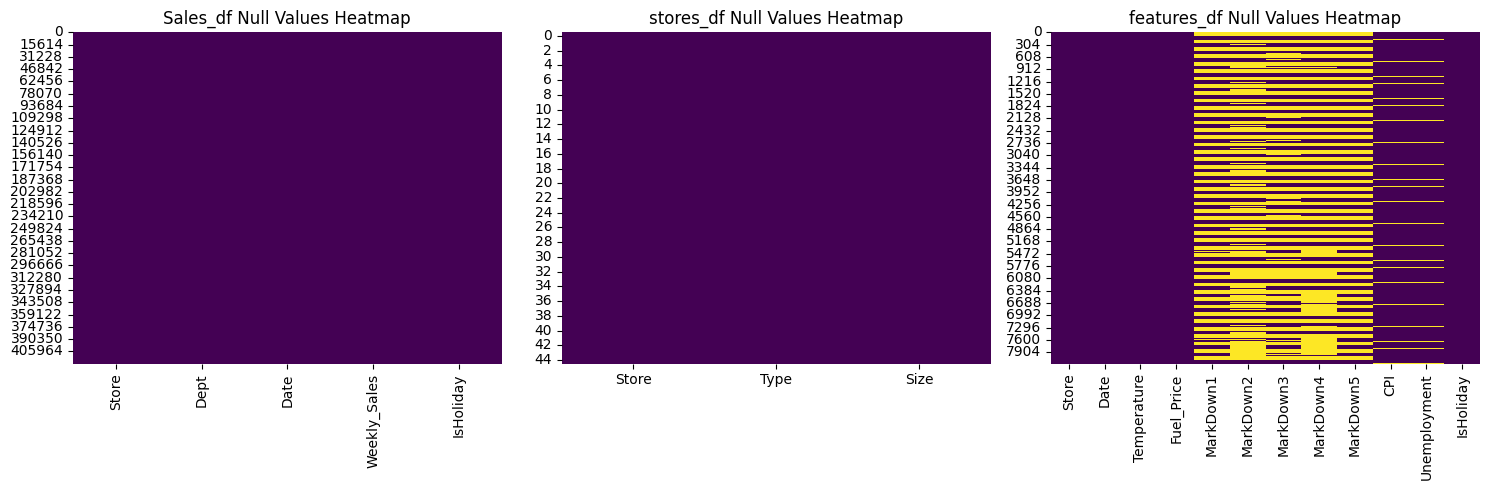

In [ ]:
# Visualizing the missing values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots with 1 row and 3 columns

# Plot heatmap for null values in sales_df1
sns.heatmap(sales_df.isnull(), cbar=False, ax=axes[0], cmap='viridis')
axes[0].set_title('Sales_df Null Values Heatmap')

# Plot heatmap for null values in sales_df2
sns.heatmap(stores_df.isnull(), cbar=False, ax=axes[1], cmap='viridis')
axes[1].set_title('stores_df Null Values Heatmap')

# Plot heatmap for null values in sales_df3
sns.heatmap(features_df.isnull(), cbar=False, ax=axes[2], cmap='viridis')
axes[2].set_title('features_df Null Values Heatmap')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot

### What did you know about your dataset?

There are 3 datasets sales_df, stores_df and features_df. Sales_df give information about weekly sales per each store. store_df gives info about store number and its size while features_df gives information about their features.There are no duplicate values in all datasets while there is presence of null values in features dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(sales_df.columns)
print(stores_df.columns)
print(features_df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [ ]:
# Dataset Describe
sales_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


### Variables Description

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
• Store - the store number
• Dept - the department number
• Date - the week
• Weekly_Sales -  sales for the given department in the given store
• IsHoliday - whether the week is a special holiday week

Features
Contains additional data related to the store, department, and regional activity for the given dates.

Store - the store number

Date - the week

Temperature - average temperature in the region

Fuel_Price - cost of fuel in the region

MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA

CPI - the consumer price index

Unemployment - the unemployment rate

IsHoliday - whether the week is a special holiday week

Sales

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
Store - the store number
Dept - the department number
Date - the week

Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(sales_df.nunique())
print(stores_df.nunique())
print(features_df.nunique())

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64
Store    45
Type      3
Size     40
dtype: int64
Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
merged_df = pd.merge(sales_df, stores_df, on='Store')
df = pd.merge(merged_df, features_df, on=['Date', 'Store', 'IsHoliday'])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index(['Store', 'Date'], inplace=True)

In [ ]:
# Replace NaN values with 0 in the markdown columns
df['MarkDown1'].fillna(0, inplace=True)
df['MarkDown2'].fillna(0, inplace=True)
df['MarkDown3'].fillna(0, inplace=True)
df['MarkDown4'].fillna(0, inplace=True)
df['MarkDown5'].fillna(0, inplace=True)


In [ ]:
df

Dept  Weekly_Sales  IsHoliday Type    Size  Temperature  \
Store Date                                                                  
1     2010-02-05     1      24924.50      False    A  151315        42.31   
      2010-02-05     2      50605.27      False    A  151315        42.31   
      2010-02-05     3      13740.12      False    A  151315        42.31   
      2010-02-05     4      39954.04      False    A  151315        42.31   
      2010-02-05     5      32229.38      False    A  151315        42.31   
...                ...           ...        ...  ...     ...          ...   
45    2012-10-26    93       2487.80      False    B  118221        58.85   
      2012-10-26    94       5203.31      False    B  118221        58.85   
      2012-10-26    95      56017.47      False    B  118221        58.85   
      2012-10-26    97       6817.48      False    B  118221        58.85   
      2012-10-26    98       1076.80      False    B  118221        58.85   

                  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Store Date                                                                 
1     2010-02-05       2.572       0.00       0.00        0.0       0.00   
      2010-02-05       2.572       0.00       0.00        0.0       0.00   
      2010-02-05       2.572       0.00       0.00        0.0       0.00   
      2010-02-05       2.572       0.00       0.00        0.0       0.00   
      2010-02-05       2.572       0.00       0.00        0.0       0.00   
...                      ...        ...        ...        ...        ...   
45    2012-10-26       3.882    4018.91      58.08      100.0     211.94   
      2012-10-26       3.882    4018.91      58.08      100.0     211.94   
      2012-10-26       3.882    4018.91      58.08      100.0     211.94   
      2012-10-26       3.882    4018.91      58.08      100.0     211.94   
      2012-10-26       3.882    4018.91      58.08      100.0     211.94   

                  MarkDown5         CPI  Unemployment  
Store Date                                             
1     2010-02-05       0.00  211.096358         8.106  
      2010-02-05       0.00  211.096358         8.106  
      2010-02-05       0.00  211.096358         8.106  
      2010-02-05       0.00  211.096358         8.106  
      2010-02-05       0.00  211.096358         8.106  
...                     ...         ...           ...  
45    2012-10-26     858.33  192.308899         8.667  
      2012-10-26     858.33  192.308899         8.667  
      2012-10-26     858.33  192.308899         8.667  
      2012-10-26     858.33  192.308899         8.667  
      2012-10-26     858.33  192.308899         8.667  

[421570 rows x 14 columns]

In [ ]:
# Anomaly detection
# Define columns to be used for anomaly detection
columns_for_anomaly_detection = ['Weekly_Sales']

# Subset the DataFrame with selected columns
df_subset = df[columns_for_anomaly_detection]

# Initialize Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model to the data
isolation_forest.fit(df_subset)

# Predict anomalies (1 for normal, -1 for anomalies)
anomaly_predictions = isolation_forest.predict(df_subset)

# Add anomaly predictions to the original DataFrame
df['Anomaly'] = anomaly_predictions

# Filter out anomalies
anomalies_df = df[df['Anomaly'] == -1]

# Print or analyze anomalies
print("Anomalies found:")
print(anomalies_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Anomalies found:
                  Dept  Weekly_Sales  IsHoliday Type    Size  Temperature  \
Store Date                                                                  
1     2010-02-05    38     115564.35      False    A  151315        42.31   
      2010-02-05    92     139884.94      False    A  151315        42.31   
      2010-02-05    95     106690.06      False    A  151315        42.31   
      2010-02-12    92     143081.42       True    A  151315        38.51   
      2010-02-12    95     111390.36       True    A  151315        38.51   
...                ...           ...        ...  ...     ...          ...   
45    2010-12-24     7     166757.11      False    B  118221        30.59   
      2010-12-24    72     136297.96      False    B  118221        30.59   
      2011-11-25    72     198041.11       True    B  118221        48.71   
      2011-12-23     7     138335.78      False    B  118221        42.27   
      2011-12-23    72     116924.78      False    B  11822

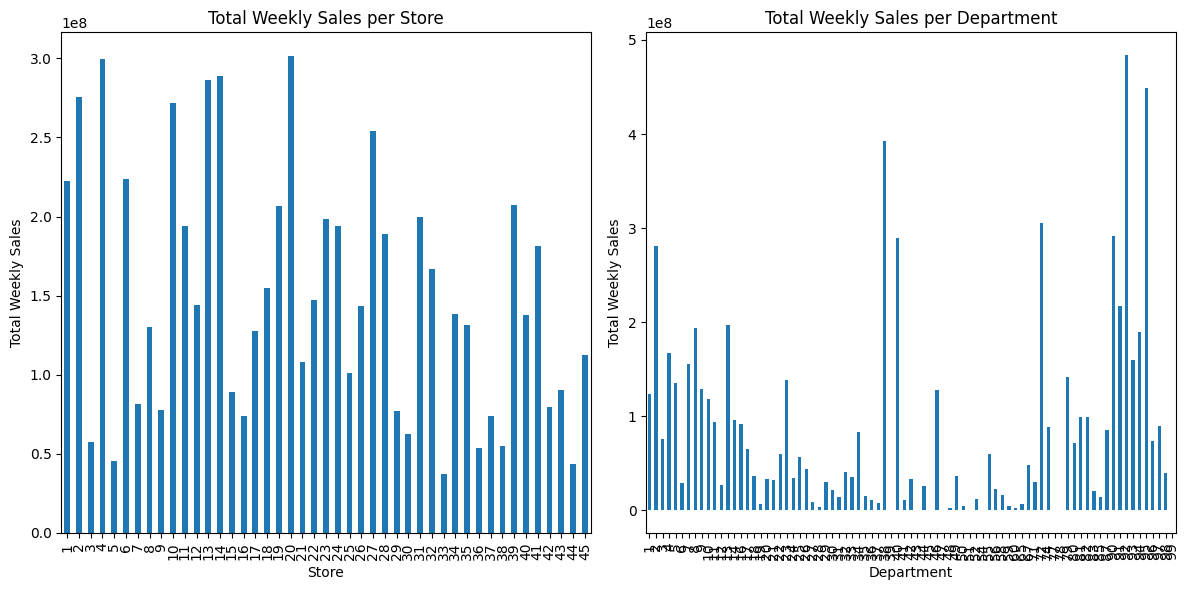

In [ ]:
# Group the DataFrame by 'Store' and 'Department' and calculate total weekly sales
total_weekly_sales_store = df.groupby('Store')['Weekly_Sales'].sum()
total_weekly_sales_dept = df.groupby('Dept')['Weekly_Sales'].sum()

# Plot 1: Weekly Sales vs. Store
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
total_weekly_sales_store.plot(kind='bar')
plt.title('Total Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')

# Plot 2: Weekly Sales vs. Department
plt.subplot(1, 2, 2)
total_weekly_sales_dept.plot(kind='bar')
plt.title('Total Weekly Sales per Department')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')

plt.tight_layout()
plt.show()

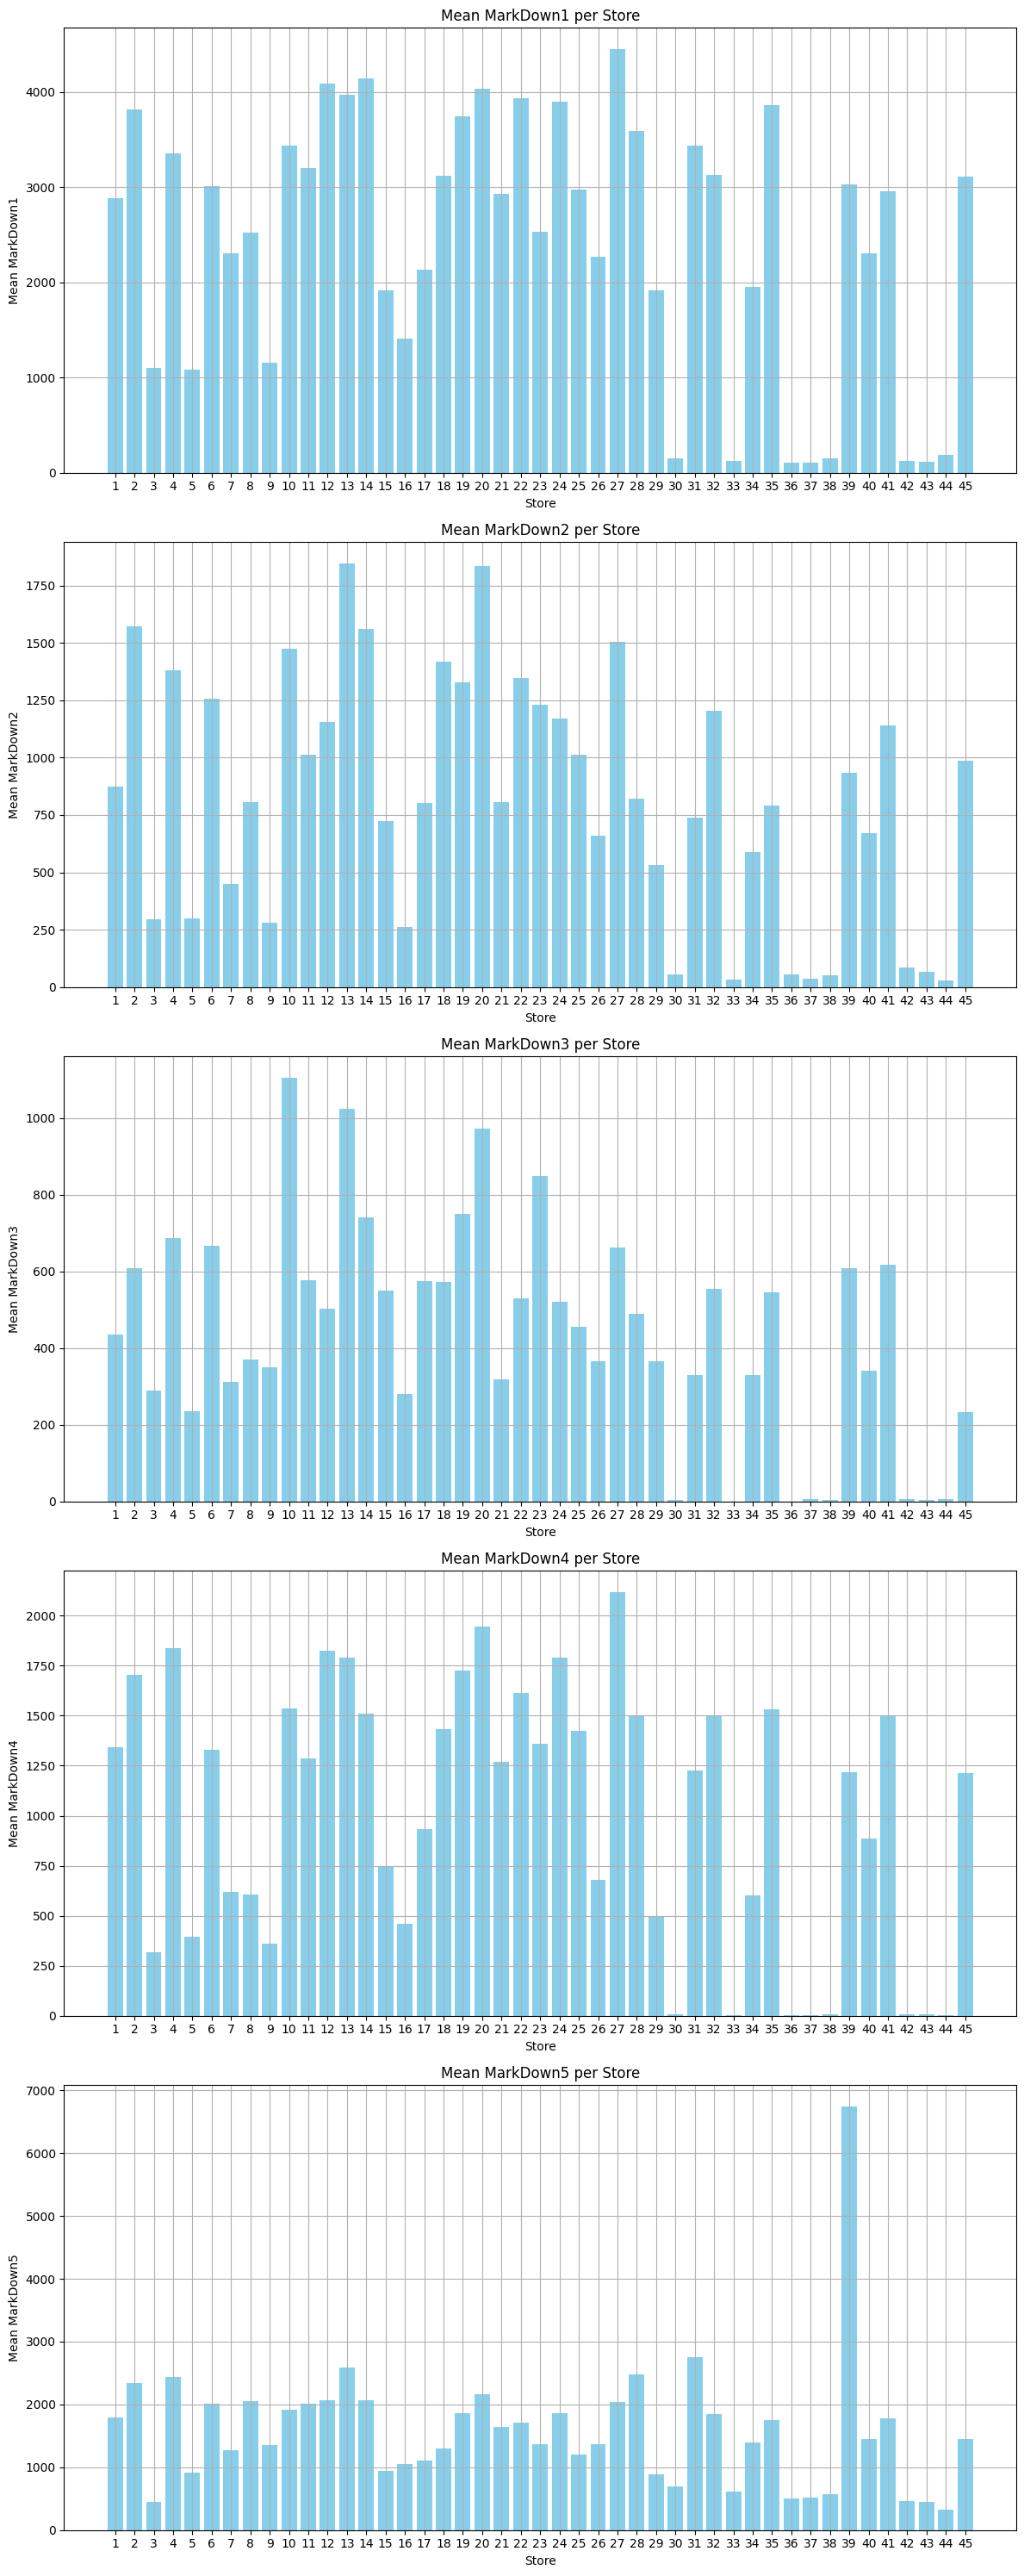

In [ ]:
# Calculate the mean Markdown values per store
mean_markdown_per_store = df.groupby('Store')[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()

# Plot bar plots for each Markdown column against Store
num_stores = mean_markdown_per_store.shape[0]
num_markdowns = mean_markdown_per_store.shape[1]

fig, axes = plt.subplots(num_markdowns, 1, figsize=(12, 6*num_markdowns))

for i, col in enumerate(mean_markdown_per_store.columns):
    ax = axes[i]
    ax.bar(mean_markdown_per_store.index, mean_markdown_per_store[col], color='skyblue')
    ax.set_title(f'Mean {col} per Store')
    ax.set_xlabel('Store')
    ax.set_ylabel(f'Mean {col}')
    ax.set_xticks(mean_markdown_per_store.index)
    ax.set_xticklabels(mean_markdown_per_store.index)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate average markdown value across Markdown1 to Markdown5 for each observation
df['Average_Markdown'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean(axis=1)

# Calculate average sales during markdown periods
average_sales_during_markdowns = df[df['Average_Markdown'] > 0]['Weekly_Sales'].mean()

# Normalize sales data by adjusting for average markdown periods
df['Normalized_Weekly_Sales'] = df['Weekly_Sales'] - average_sales_during_markdowns


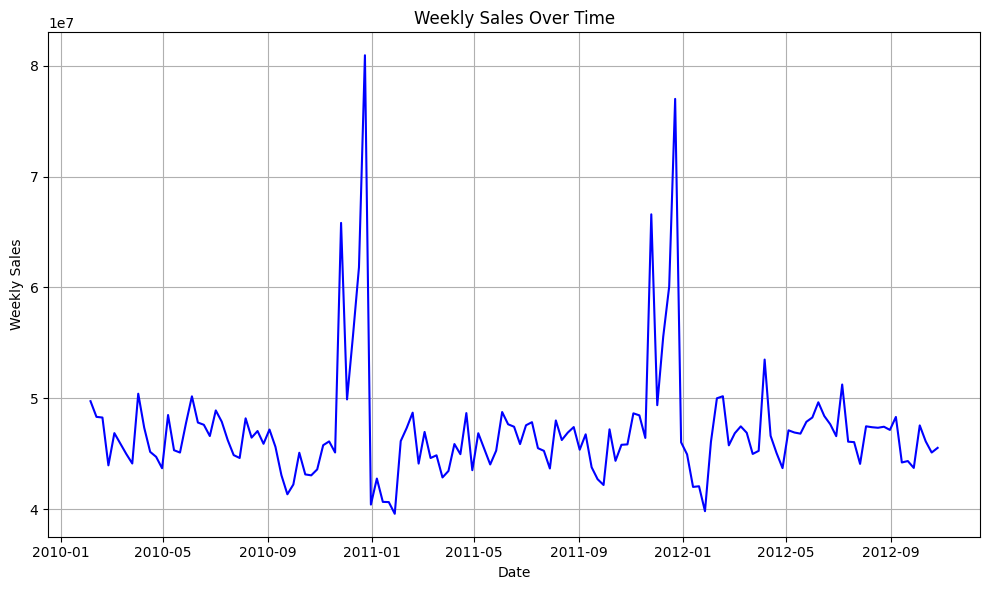

In [ ]:
# Group data by date and calculate sum of weekly sales
weekly_sales_by_date = df.groupby('Date')['Weekly_Sales'].sum()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_by_date.index, weekly_sales_by_date.values, color='blue')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Extract month from the date
df['Month'] = df.index.get_level_values(1).month

# Identify Christmas month (December)
christmas_month_sales = df[df['Month'] == 12]['Weekly_Sales']
average_christmas_month_sales = christmas_month_sales.mean()

# Perform seasonal adjustment for Christmas month
df['Deseasonalized_Weekly_Sales'] = df['Weekly_Sales']
df.loc[df['Month'] == 12, 'Deseasonalized_Weekly_Sales'] -= average_christmas_month_sales

In [ ]:
df

Dept  Weekly_Sales  IsHoliday Type    Size  Temperature  \
Store Date                                                                  
1     2010-02-05     1      24924.50      False    A  151315        42.31   
      2010-02-05     2      50605.27      False    A  151315        42.31   
      2010-02-05     3      13740.12      False    A  151315        42.31   
      2010-02-05     4      39954.04      False    A  151315        42.31   
      2010-02-05     5      32229.38      False    A  151315        42.31   
...                ...           ...        ...  ...     ...          ...   
45    2012-10-26    93       2487.80      False    B  118221        58.85   
      2012-10-26    94       5203.31      False    B  118221        58.85   
      2012-10-26    95      56017.47      False    B  118221        58.85   
      2012-10-26    97       6817.48      False    B  118221        58.85   
      2012-10-26    98       1076.80      False    B  118221        58.85   

                  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Store Date                                                                 
1     2010-02-05       2.572       0.00       0.00        0.0       0.00   
      2010-02-05       2.572       0.00       0.00        0.0       0.00   
      2010-02-05       2.572       0.00       0.00        0.0       0.00   
      2010-02-05       2.572       0.00       0.00        0.0       0.00   
      2010-02-05       2.572       0.00       0.00        0.0       0.00   
...                      ...        ...        ...        ...        ...   
45    2012-10-26       3.882    4018.91      58.08      100.0     211.94   
      2012-10-26       3.882    4018.91      58.08      100.0     211.94   
      2012-10-26       3.882    4018.91      58.08      100.0     211.94   
      2012-10-26       3.882    4018.91      58.08      100.0     211.94   
      2012-10-26       3.882    4018.91      58.08      100.0     211.94   

                  MarkDown5         CPI  Unemployment  Anomaly  \
Store Date                                                       
1     2010-02-05       0.00  211.096358         8.106        1   
      2010-02-05       0.00  211.096358         8.106        1   
      2010-02-05       0.00  211.096358         8.106        1   
      2010-02-05       0.00  211.096358         8.106        1   
      2010-02-05       0.00  211.096358         8.106        1   
...                     ...         ...           ...      ...   
45    2012-10-26     858.33  192.308899         8.667        1   
      2012-10-26     858.33  192.308899         8.667        1   
      2012-10-26     858.33  192.308899         8.667        1   
      2012-10-26     858.33  192.308899         8.667        1   
      2012-10-26     858.33  192.308899         8.667        1   

                  Average_Markdown  Normalized_Weekly_Sales  Month  \
Store Date                                                           
1     2010-02-05             0.000              8747.484756      2   
      2010-02-05             0.000             34428.254756      2   
      2010-02-05             0.000             -2436.895244      2   
      2010-02-05             0.000             23777.024756      2   
      2010-02-05             0.000             16052.364756      2   
...                            ...                      ...    ...   
45    2012-10-26          1049.452            -13689.215244     10   
      2012-10-26          1049.452            -10973.705244     10   
      2012-10-26          1049.452             39840.454756     10   
      2012-10-26          1049.452             -9359.535244     10   
      2012-10-26          1049.452            -15100.215244     10   

                  Deseasonalized_Weekly_Sales  
Store Date                                     
1     2010-02-05                     24924.50  
      2010-02-05                     50605.27  
      2010-02-05                     13740.12  
      2010-02-05 

### What all manipulations have you done and insights you found?

fromm above analysis we can see that there are two reason of anomalies in sales data,

1) Stores which regularly have markdowns and promotional offers tend to have higher average sales.

2) At year end particularly Christmas week sales gets increases dur festival of christmas.

To remove effecyts of MarkDown and seasonal variations created new weekly sales columns which are deseasonalized and normalized for markdowns.

Converted Date column in Datetime datatype.

# **Customer Segmentation Analysis**

In [ ]:
df['IsHoliday'] = df['IsHoliday'].astype(int)
type_mapping = {'A': 0, 'B': 1, 'C': 2}
df['Type'] = df['Type'].map(type_mapping)

In [ ]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
# Step 3: Apply K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
kmeans.fit(scaled_data)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



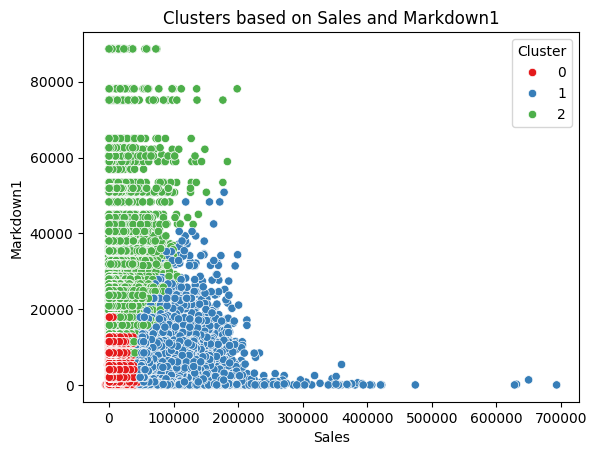

In [ ]:
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Plot the clusters using two selected features (you can choose any two features)
sns.scatterplot(x='Weekly_Sales', y='MarkDown1', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters based on Sales and Markdown1')
plt.xlabel('Sales')
plt.ylabel('Markdown1')
plt.show()

**Analysis of Segment-Specific Trends and Characteristics**

let's infer cluster 0 as segment 0, cluster 1 as segment 1 and cluster 2 as segment 2. Analyzing trends for each segment

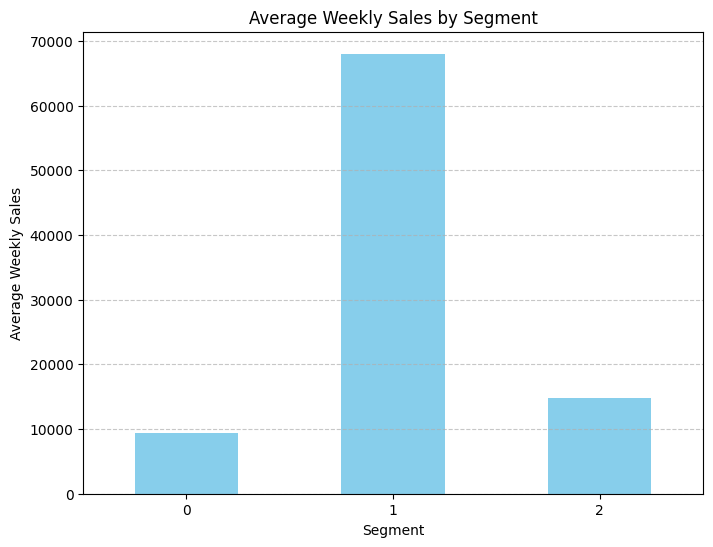

In [ ]:
segment_sales = df.groupby('Cluster')['Weekly_Sales'].mean()

# Step 2: Create a bar plot
plt.figure(figsize=(8, 6))
segment_sales.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

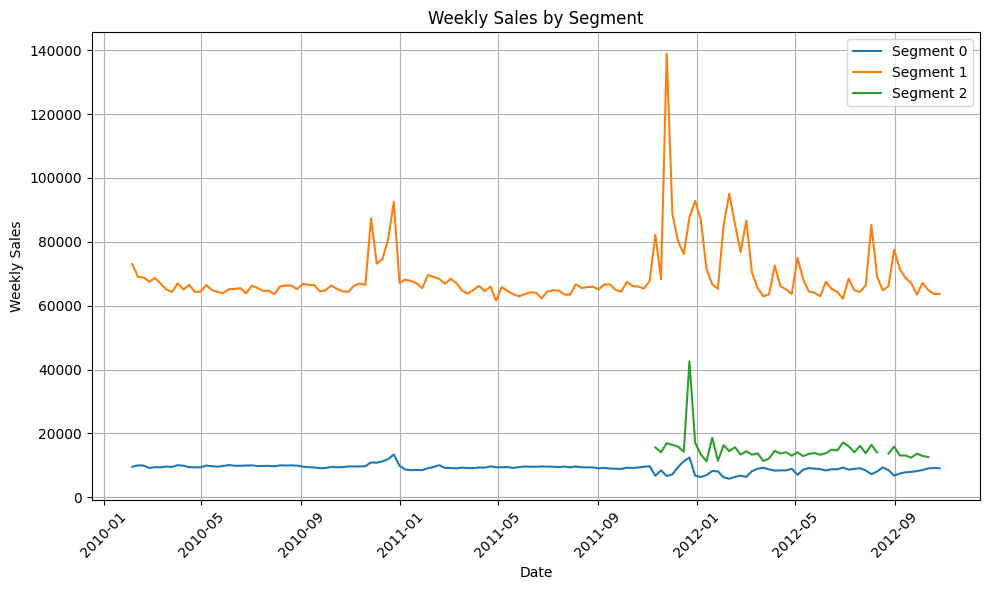

In [ ]:
# Step 1: Resample the data to get weekly sales data for each segment
segment_sales = df.groupby(['Cluster', df.index.get_level_values(1)])['Weekly_Sales'].mean().unstack(level=0)

# Step 2: Plot a line chart for each segment
plt.figure(figsize=(10, 6))

for segment in segment_sales.columns:
    plt.plot(segment_sales.index, segment_sales[segment], label=f'Segment {segment}')

plt.title('Weekly Sales by Segment')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

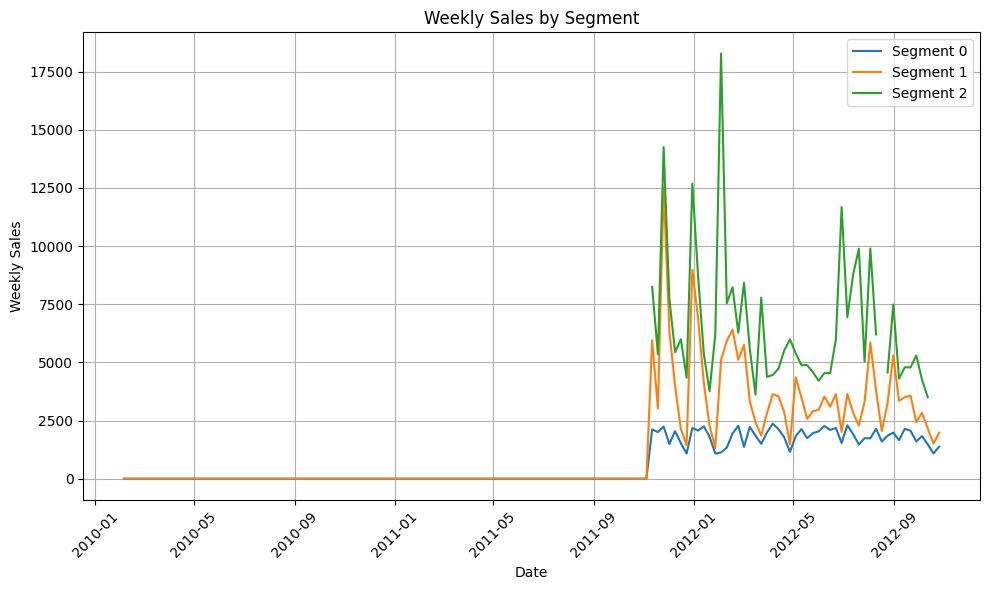

In [ ]:
# Step 1: Resample the data to get weekly sales data for each segment
segment_sales = df.groupby(['Cluster', df.index.get_level_values(1)])['Average_Markdown'].mean().unstack(level=0)

# Step 2: Plot a line chart for each segment
plt.figure(figsize=(10, 6))

for segment in segment_sales.columns:
    plt.plot(segment_sales.index, segment_sales[segment], label=f'Segment {segment}')

plt.title('Weekly Sales by Segment')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

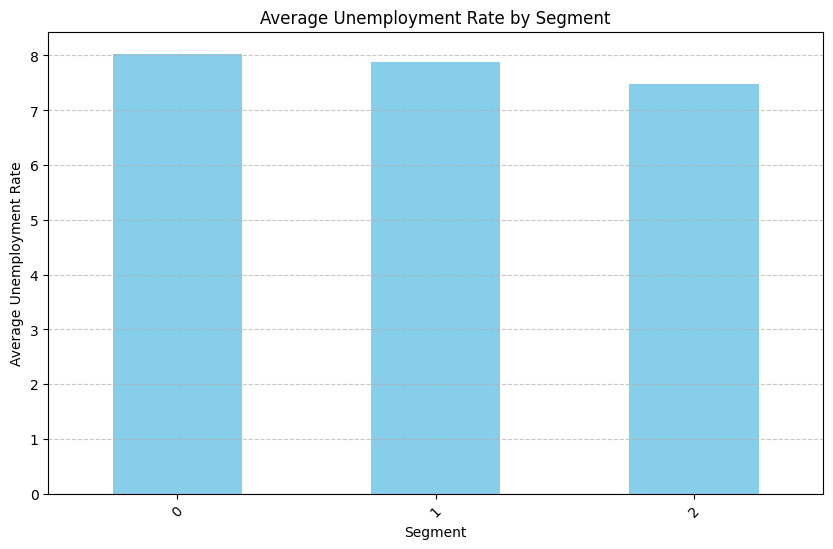

In [ ]:
segment_unemployment = df.groupby('Cluster')['Unemployment'].mean()

# Step 2: Create the bar plot
plt.figure(figsize=(10, 6))
segment_unemployment.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Market Basket Analysis**

In [ ]:
sales_df['Store'] = sales_df['Store'].astype('category')
sales_df['Dept'] = sales_df['Dept'].astype('string')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Dept          421570 non-null  string        
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), string(1)
memory usage: 10.5 MB


In [ ]:
for i in (sales_df.Store.unique()):
    print("Number of records for Store no. " + str(i) + " is" ,str(len(sales_df[(sales_df['Store'] == i)])))

Number of records for Store no. 1 is 10244
Number of records for Store no. 2 is 10238
Number of records for Store no. 3 is 9036
Number of records for Store no. 4 is 10272
Number of records for Store no. 5 is 8999
Number of records for Store no. 6 is 10211
Number of records for Store no. 7 is 9762
Number of records for Store no. 8 is 9895
Number of records for Store no. 9 is 8867
Number of records for Store no. 10 is 10315
Number of records for Store no. 11 is 10062
Number of records for Store no. 12 is 9705
Number of records for Store no. 13 is 10474
Number of records for Store no. 14 is 10040
Number of records for Store no. 15 is 9901
Number of records for Store no. 16 is 9443
Number of records for Store no. 17 is 9864
Number of records for Store no. 18 is 9859
Number of records for Store no. 19 is 10148
Number of records for Store no. 20 is 10214
Number of records for Store no. 21 is 9582
Number of records for Store no. 22 is 9688
Number of records for Store no. 23 is 10050
Number of

In [ ]:
store_num=38
sales_data_new=sales_df[(sales_df['Store'] == 10) & (sales_df['Dept'].isin(['1', '2', '3', '4','5' ]))].drop(columns=['IsHoliday'])

In [ ]:
sales_data_new.shape

(715, 4)

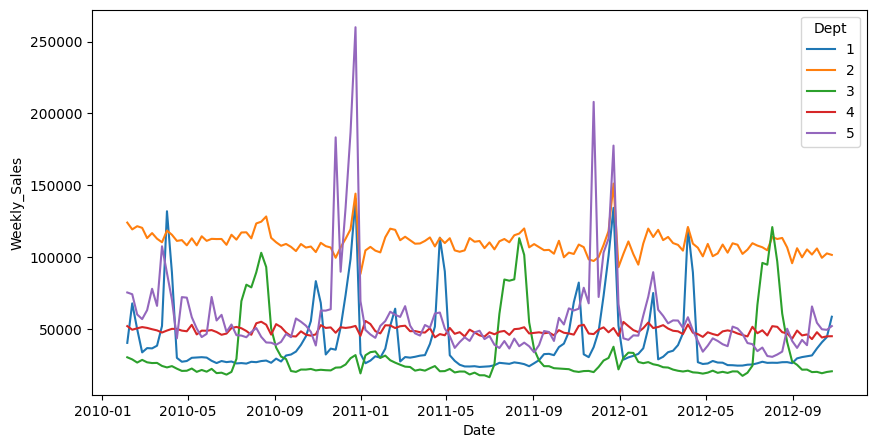

In [ ]:
sales_data_new['Date'] = pd.to_datetime(sales_data_new['Date'])
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_data_new, x='Date', y='Weekly_Sales',hue="Dept")
plt.show()

In [ ]:
df_dept4_marketing=sales_data_new.copy()
df_dept4_marketing['Marketing_Campaign'] = np.where((df_dept4_marketing['Dept'] == '4') & (df_dept4_marketing['Date'] > "2012-06-30") &
    (df_dept4_marketing['Date'] < "2012-10-01"),'Active', 'Inactive')

In [ ]:
print(df_dept4_marketing[
    (df_dept4_marketing['Date'] > "2012-06-01") &
    (df_dept4_marketing['Date'] < "2012-12-01") &
    ((df_dept4_marketing['Dept'] == '2') | (df_dept4_marketing['Dept'] == '4'))])

      Store Dept       Date  Weekly_Sales Marketing_Campaign
87789    10    2 2012-06-08     109543.37           Inactive
87790    10    2 2012-06-15     108530.26           Inactive
87791    10    2 2012-06-22     102144.47           Inactive
87792    10    2 2012-06-29     105107.69           Inactive
87793    10    2 2012-07-06     109596.98           Inactive
87794    10    2 2012-07-13     107945.92           Inactive
87795    10    2 2012-07-20     106771.51           Inactive
87796    10    2 2012-07-27     104651.11           Inactive
87797    10    2 2012-08-03     113930.50           Inactive
87798    10    2 2012-08-10     112523.39           Inactive
87799    10    2 2012-08-17     113259.20           Inactive
87800    10    2 2012-08-24     106630.07           Inactive
87801    10    2 2012-08-31      95671.50           Inactive
87802    10    2 2012-09-07     106094.76           Inactive
87803    10    2 2012-09-14      99757.84           Inactive
87804    10    2 2012-09

In [ ]:
new_sales = df_dept4_marketing.copy()
new_sales['New_sales']=np.where(new_sales['Marketing_Campaign']=="Active",new_sales['Weekly_Sales'] * 1.45 ,new_sales['Weekly_Sales'])
new_sales

,Store,Dept,Date,Weekly_Sales,Marketing_Campaign,New_sales
87524,10,1,2010-02-05,40212.84,Inactive,40212.84
87525,10,1,2010-02-12,67699.32,Inactive,67699.32
87526,10,1,2010-02-19,49748.33,Inactive,49748.33
87527,10,1,2010-02-26,33601.22,Inactive,33601.22
87528,10,1,2010-03-05,36572.44,Inactive,36572.44
...,...,...,...,...,...,...
88234,10,5,2012-09-28,65585.96,Inactive,65585.96
88235,10,5,2012-10-05,54202.85,Inactive,54202.85
88236,10,5,2012-10-12,49683.63,Inactive,49683.63
88237,10,5,2012-10-19,49277.87,Inactive,49277.87


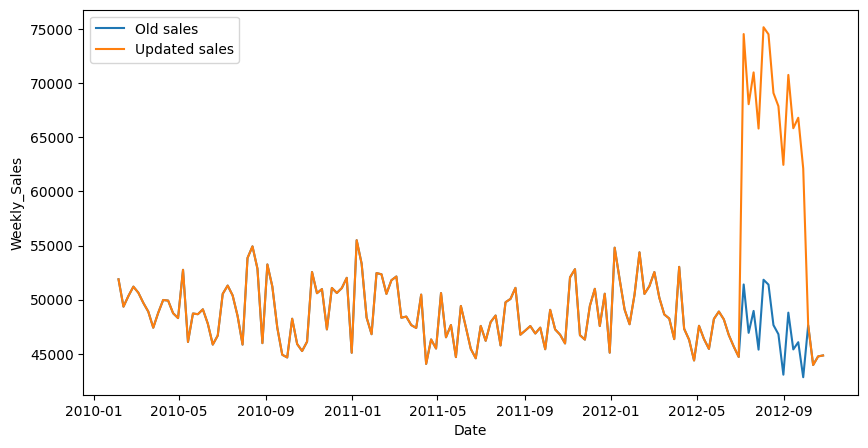

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=sales_data_new.query("Dept == '4'"),
    x="Date", y="Weekly_Sales",label='Old sales'
)
sns.lineplot(
    data=new_sales.query("Dept == '4'"),
    x="Date", y="New_sales",label='Updated sales'
)
plt.show()

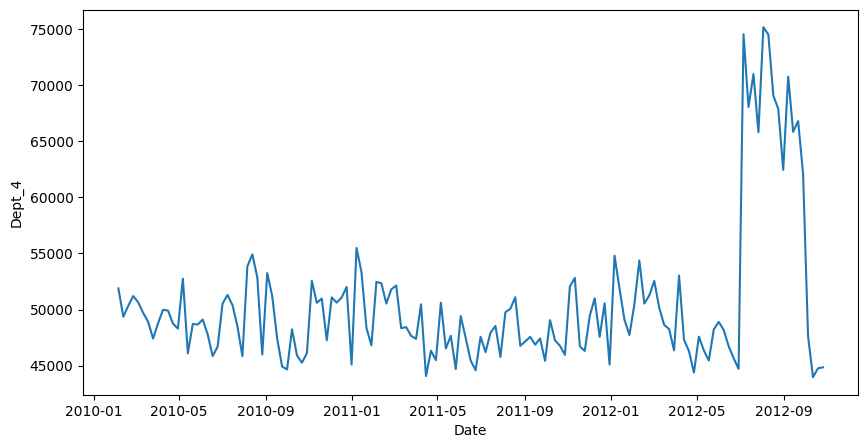

In [ ]:
df_sales_causal=new_sales.pivot(index="Date", columns="Dept", values="New_sales")
df_sales_causal.columns=['Dept_1', 'Dept_2', 'Dept_3', 'Dept_4', 'Dept_5']
df_sales_causal=df_sales_causal.sort_values(by='Date')
df_final=df_sales_causal.drop(['Dept_1', 'Dept_2', 'Dept_3', 'Dept_5'],axis=1)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_final,x="Date", y="Dept_4")
plt.show()

In [ ]:
sales_df.Date.min(), sales_df.Date.max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

**Casual Inference**

In [ ]:
marketing_pre_period=['2010-02-05','2010-03-05']
marketing_post_period=['2012-09-28','2012-10-05']
impact = CausalImpact(df_final, marketing_pre_period, marketing_post_period)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [ ]:
#Causal impact summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    54881.8            109763.6
Prediction (s.d.)         50688.72 (763.77)  101377.44 (1527.54)
95% CI                    [49219.49, 52213.41][98438.98, 104426.82]

Absolute effect (s.d.)    4193.08 (763.77)   8386.15 (1527.54)
95% CI                    [2668.39, 5662.31] [5336.77, 11324.62]

Relative effect (s.d.)    8.27% (1.51%)      8.27% (1.51%)
95% CI                    [5.26%, 11.17%]    [5.26%, 11.17%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


## ***7. ML Model Implementation***

In [ ]:
df.index = df.index.droplevel(level=0)

In [ ]:
# The Weekly Sales column will be pulled out to create a new dataframe
df_Sales = df[['Weekly_Sales']]

In [ ]:
# Next, we resample the dataframe to show average sales per month only, instead of every week.
df_Sales = df_Sales.resample(rule='M').mean()

In [ ]:
# rename the 'Weekly_Sales' column to 'Monthly_Sales'
df_Sales = df_Sales.rename(columns={'Weekly_Sales':'Monthly_Sales'})

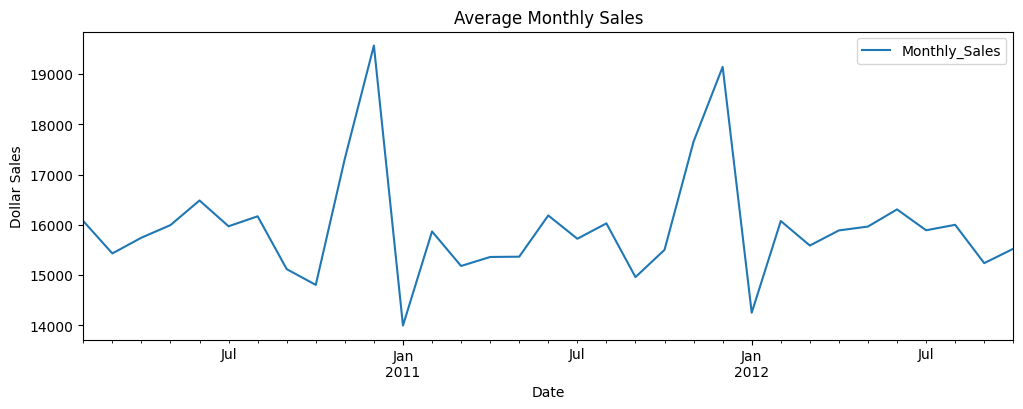

In [ ]:
# plot the sales on a lineplot
df_Sales.plot(figsize=(12,4))

plt.title('Average Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Dollar Sales');

In [ ]:
# export the dataframe so we can use it again
df.to_csv('Retail Sales Monthly.csv',index=False)

In [ ]:
# Split the Data into Training and Test Splits
# sales train variable from the begining of the dataframe to 22 months
sales_train = df_Sales.iloc[:22]
# sales test variable from 22 months to the end of the dataframe
sales_test = df_Sales.iloc[21:]

### ML Model -

In [ ]:
# I'll use the additive method because the seasonal variations are roughly constant through the series
# Here, we fit the model on the training data 'sales_train'
fitted_model = ExponentialSmoothing(sales_train['Monthly_Sales'],
                                   trend = 'add',
                                   seasonal = 'add',
                                   seasonal_periods = 10).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
test_predictions = fitted_model.forecast(24)

In [ ]:
# print the test_predictions
# this is a series that predicts certain values for a date
test_predictions

2011-12-31    15699.524112
2012-01-31    15167.415987
2012-02-29    15432.464072
2012-03-31    15530.570100
2012-04-30    15874.072008
2012-05-31    15033.005059
2012-06-30    14924.412089
2012-07-31    16327.482541
2012-08-31    17505.234487
2012-09-30    14029.885139
2012-10-31    15539.746995
2012-11-30    15007.638870
2012-12-31    15272.686955
2013-01-31    15370.792983
2013-02-28    15714.294891
2013-03-31    14873.227942
2013-04-30    14764.634972
2013-05-31    16167.705424
2013-06-30    17345.457370
2013-07-31    13870.108022
2013-08-31    15379.969878
2013-09-30    14847.861753
2013-10-31    15112.909838
2013-11-30    15211.015866
Freq: M, dtype: float64

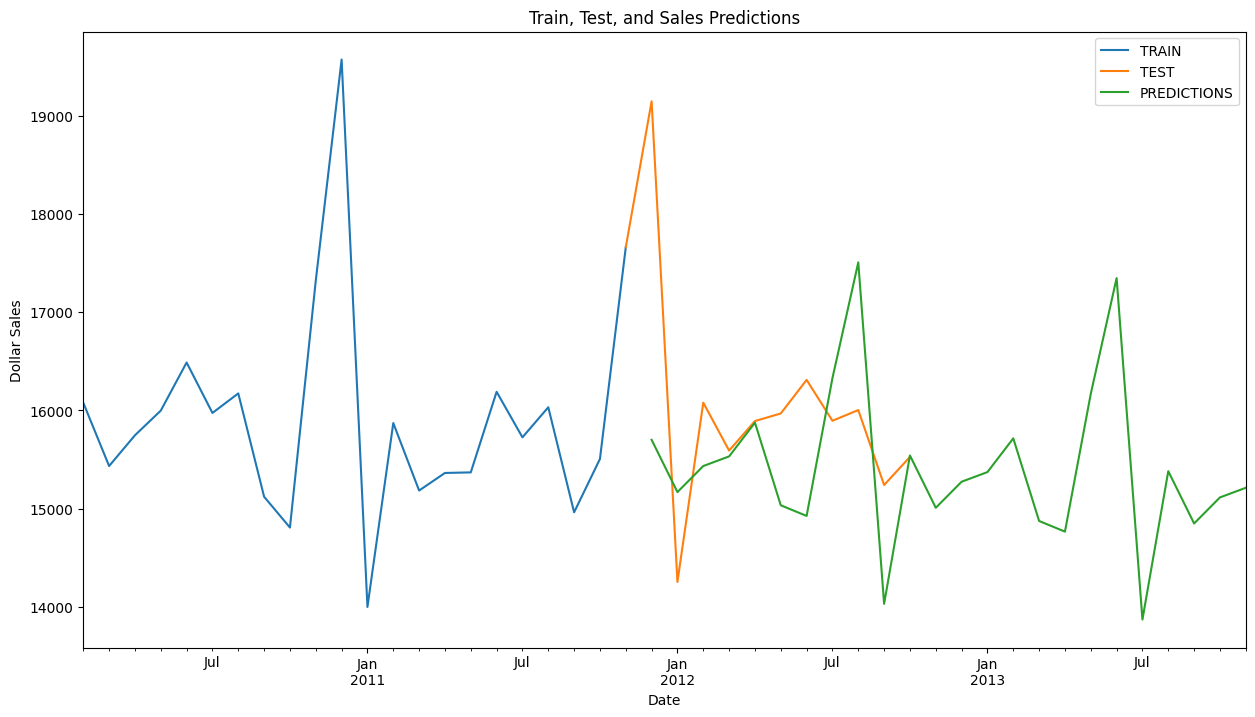

In [ ]:
# plot the test predictions against the past sales and test set
sales_train['Monthly_Sales'].plot(legend=True, label= 'TRAIN', figsize=(15,8))
sales_test['Monthly_Sales'].plot(legend=True, label= 'TEST', figsize=(15,8))
test_predictions.plot(legend=True, label= 'PREDICTIONS', figsize=(15,8))

plt.title('Train, Test, and Sales Predictions')
plt.xlabel("Date")
plt.ylabel("Dollar Sales");

**Exponential Smoothing**

In [ ]:
# ML Model - 3 Implementation
# I'll use the additive method because the seasonal variations are roughly constant through the series
# Here, we fit the model on the training data 'sales_train'
fitted_model = ExponentialSmoothing(sales_train['Monthly_Sales'],
                                   trend = 'add',
                                   seasonal = 'add',
                                   seasonal_periods = 10).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
test_predictions = fitted_model.forecast(24)

In [ ]:
# print the test_predictions
# this is a series that predicts certain values for a date
test_predictions

2011-12-31    15699.524112
2012-01-31    15167.415987
2012-02-29    15432.464072
2012-03-31    15530.570100
2012-04-30    15874.072008
2012-05-31    15033.005059
2012-06-30    14924.412089
2012-07-31    16327.482541
2012-08-31    17505.234487
2012-09-30    14029.885139
2012-10-31    15539.746995
2012-11-30    15007.638870
2012-12-31    15272.686955
2013-01-31    15370.792983
2013-02-28    15714.294891
2013-03-31    14873.227942
2013-04-30    14764.634972
2013-05-31    16167.705424
2013-06-30    17345.457370
2013-07-31    13870.108022
2013-08-31    15379.969878
2013-09-30    14847.861753
2013-10-31    15112.909838
2013-11-30    15211.015866
Freq: M, dtype: float64

# **Plot the Predictions against the Training, and Test Sets**

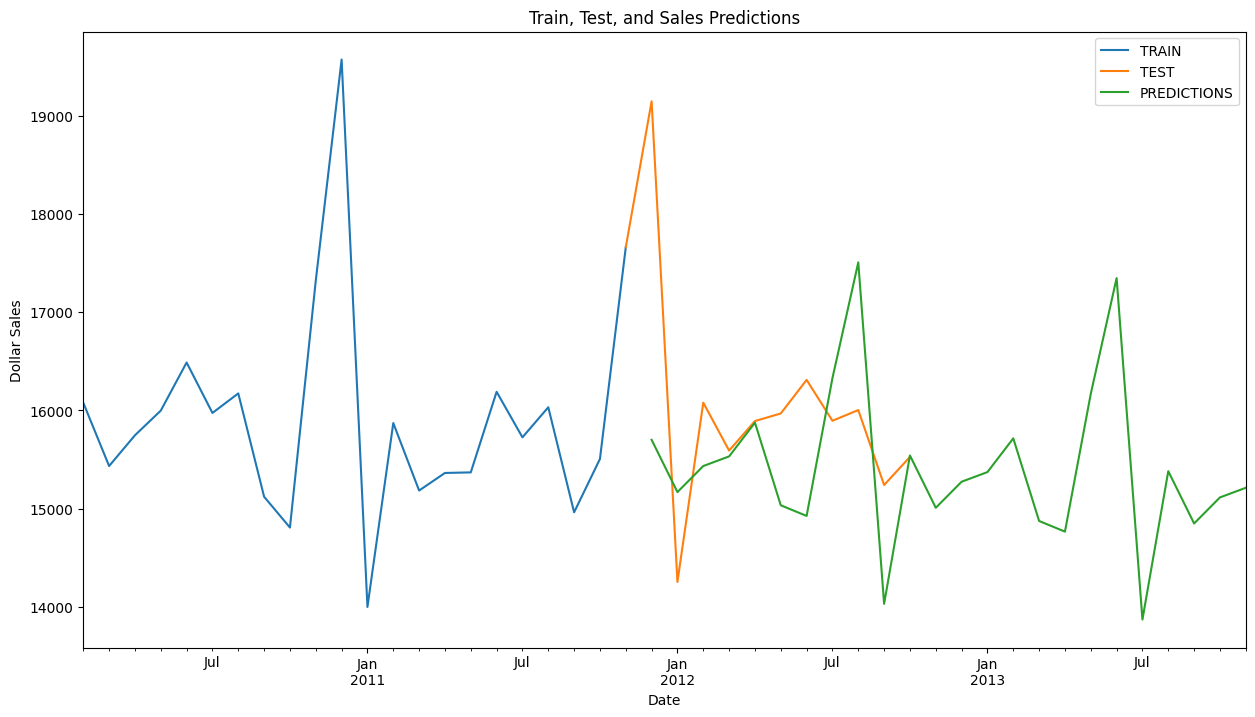

In [ ]:
# plot the test predictions against the past sales and test set
sales_train['Monthly_Sales'].plot(legend=True, label= 'TRAIN', figsize=(15,8))
sales_test['Monthly_Sales'].plot(legend=True, label= 'TEST', figsize=(15,8))
test_predictions.plot(legend=True, label= 'PREDICTIONS', figsize=(15,8))

plt.title('Train, Test, and Sales Predictions')
plt.xlabel("Date")
plt.ylabel("Dollar Sales");

In [ ]:
# find the sales standard deviation and mean
sales_test.describe()

,Monthly_Sales
count,12.000000
mean,16129.313665
std,1228.316645
min,14252.698030
25%,15573.705126
50%,15930.357455
75%,16135.547673
max,19145.218481


In [ ]:
# change the size of the forecast
# we have to make the size of the forecast the same as the test set in order to get the squared errors
test_predictions = fitted_model.forecast(12)

In [ ]:
# find the mean squared error
MSE = mean_squared_error(sales_test, test_predictions)
# find the mean absolute error
MAE = mean_absolute_error(sales_test, test_predictions)
# find the root mean squared error
RMSE = np.sqrt(mean_squared_error(sales_test, test_predictions))
# suppress scientific notation in the dataframe
pd.options.display.float_format = '{:.2f}'.format
# create a dataframe showing the error results
results = pd.DataFrame({'Squared Error': ['MSE','MAE','RMSE','STD DVTN'],
                       'Score': [MSE,MAE,RMSE, '1047']})
results = results.set_index('Squared Error')
results

,Score
Squared Error,
MSE,2508793.97
MAE,1189.13
RMSE,1583.92
STD DVTN,1047


# **Conclusion**

There are 3 datasets sales_df, stores_df and features_df. Sales_df give information about weekly sales per each store. store_df gives info about store number and its size while features_df gives information about their features.There are no duplicate values in all datasets while there is presence of null values in features dataset.

Market Basket Analysis shows that, average sales is highest for segment 1 or cluster 1.Average unemployement rate is highest in segment 0.Out of the all departments dept 2 has highest weekly sales.

Seasonal Variation in sales can be observed in above graphs in end of december month this spikes in sales might be due to christmas festival.

Exponential Smoothing additive method was used as Machine learning algorithm for sales predictions as seasonal variations are nearly constant.Data was splitted into train and test and ML model shows better accuracy in preicion of sales with RMSE value of 1584 and mean absolute error as 1189.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***